In [1]:
#Importing most of the libraries we have used in our assignments that we will use in this project

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./data.csv")
df[0::10]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
10,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
20,0,0.485253,0.545573,0.534665,0.622177,0.622256,0.999065,0.797522,0.809406,0.303554,...,0.804639,0.014039,0.623922,0.622177,0.840639,0.277988,0.026794,0.565171,1,0.039507
30,1,0.462195,0.536034,0.514428,0.599987,0.599987,0.998909,0.797291,0.809223,0.303477,...,0.787082,0.001631,0.621876,0.599984,0.838259,0.297038,0.024886,0.576473,1,0.014562
40,0,0.507824,0.571631,0.549226,0.625326,0.625326,0.999136,0.797542,0.809413,0.303442,...,0.815731,0.007173,0.623729,0.625327,0.841574,0.279236,0.026908,0.565659,1,0.031485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,0,0.435967,0.498692,0.486054,0.603626,0.603626,0.998893,0.797239,0.809179,0.303421,...,0.773759,0.001563,0.623994,0.603624,0.838736,0.276539,0.026787,0.565138,1,0.062338
6780,0,0.520402,0.586295,0.567910,0.610545,0.610343,0.999095,0.797565,0.809454,0.303567,...,0.827839,0.003365,0.624445,0.610541,0.841969,0.276784,0.026791,0.565160,1,0.056275
6790,0,0.474333,0.530637,0.524653,0.599281,0.599353,0.998958,0.797356,0.809287,0.303489,...,0.791776,0.000581,0.622525,0.599277,0.839482,0.287351,0.025696,0.707735,1,0.017872
6800,0,0.438210,0.493295,0.484769,0.619762,0.619784,0.998926,0.797223,0.809153,0.303323,...,0.772423,0.000526,0.623801,0.619757,0.838684,0.276378,0.026774,0.565077,1,0.067287


In [5]:
#feature columns
X = df.drop('Bankrupt?', axis=1)

#label column
y = df['Bankrupt?']

0    6599
1     220
Name: Bankrupt?, dtype: int64


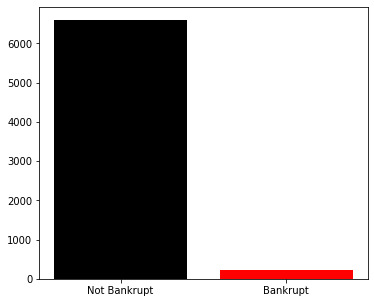

In [6]:
#we have inbalanced data
print(df['Bankrupt?'].value_counts())

no = df['Bankrupt?'].value_counts()[0]
yes = df['Bankrupt?'].value_counts()[1]


names = ['Not Bankrupt','Bankrupt']
values = [no,yes]
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=['black','red'])
plt.show()

In [7]:
#pip install -U imbalanced-learn

# transform the dataset using smote oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

1    6599
0    6599
Name: Bankrupt?, dtype: int64


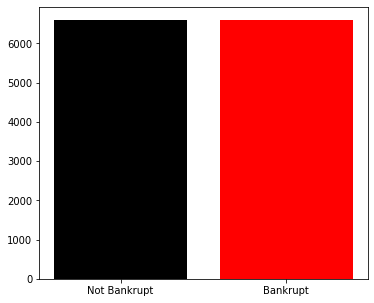

In [8]:
print(y.value_counts())

yes = y.value_counts()[0]
no = y.value_counts()[1]


names = ['Not Bankrupt','Bankrupt']
values = [no,yes]
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=['black','red'])
plt.show()

In [9]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(9238, 95)
(9238,)
(3960, 95)
(3960,)


# ANN - Neural Network

## Before using breadth first search cv to find the best structure for an ANN with one hidden layer i will try myself to create different neurons with different number of neurons and test on the data set just to see what accuracy i get .

In [10]:
from sklearn.neural_network import MLPClassifier

#checking the datasets 
X_train[::]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
7675,0.284531,0.296805,0.307184,0.589631,0.589631,0.998434,0.796697,0.808634,0.303433,0.780837,...,0.658072,7.470090e+09,0.623639,0.589628,0.769925,0.340046,0.026763,0.565019,1,0.011837
782,0.521669,0.572285,0.564163,0.608145,0.608145,0.998995,0.797566,0.809441,0.303779,0.781717,...,0.814862,1.282881e-03,0.623384,0.608144,0.842202,0.284532,0.026964,0.565867,1,0.020059
1742,0.509628,0.540994,0.550725,0.599483,0.599483,0.998962,0.797425,0.809340,0.303601,0.781547,...,0.800274,1.241421e-03,0.623177,0.599478,0.840318,0.277313,0.027240,0.566661,1,0.047013
3401,0.489251,0.541485,0.541303,0.607165,0.607208,0.999016,0.797426,0.809340,0.303490,0.781633,...,0.800896,4.114006e-03,0.623814,0.607165,0.840440,0.279708,0.027003,0.565999,1,0.029489
12963,0.440829,0.491465,0.488026,0.604982,0.604939,0.998896,0.797269,0.809196,0.303467,0.781438,...,0.765754,6.334636e-04,0.623509,0.604983,0.835563,0.288875,0.026538,0.563568,1,0.017176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,0.468581,0.535816,0.519193,0.640316,0.640316,0.999384,0.797923,0.809678,0.303590,0.781968,...,0.798928,1.703027e-03,0.624423,0.640316,0.840223,0.276905,0.026806,0.565227,1,0.053767
11798,0.490959,0.514655,0.531508,0.593728,0.593728,0.998887,0.797253,0.809187,0.303458,0.781420,...,0.783054,4.062197e-03,0.624081,0.593725,0.839028,0.279343,0.026367,0.561771,1,0.031094
6637,0.479842,0.546718,0.531292,0.595937,0.595937,0.998947,0.797514,0.809422,0.303787,0.781698,...,0.804093,1.242582e-02,0.622299,0.595935,0.840633,0.278555,0.027041,0.566121,1,0.035220
2575,0.518842,0.559802,0.560362,0.634500,0.634500,0.999020,0.797445,0.809352,0.303513,0.781613,...,0.806752,1.236856e-03,0.623632,0.634495,0.841411,0.286340,0.027300,0.566796,1,0.018534


## ANN with 30 neurons , one hidden layer

In [11]:
# training an ann
# 1 Hidden Layer with 30 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

In [12]:
my_ANN.fit(X_train, y_train)

Iteration 1, loss = 7.33288593
Iteration 2, loss = 1.30552573
Iteration 3, loss = 1.25186438
Iteration 4, loss = 1.20954308
Iteration 5, loss = 1.14128978
Iteration 6, loss = 1.10767717
Iteration 7, loss = 1.10334653
Iteration 8, loss = 1.10356240
Iteration 9, loss = 1.10687538
Iteration 10, loss = 1.09562205
Iteration 11, loss = 1.09534352
Iteration 12, loss = 1.10322488
Iteration 13, loss = 1.09537594
Iteration 14, loss = 1.09227743
Iteration 15, loss = 1.09257476
Iteration 16, loss = 1.08451547
Iteration 17, loss = 1.08429177
Iteration 18, loss = 1.08436541
Iteration 19, loss = 1.08394241
Iteration 20, loss = 1.08407638
Iteration 21, loss = 1.08418204
Iteration 22, loss = 1.08422496
Iteration 23, loss = 1.08421820
Iteration 24, loss = 1.08431163
Iteration 25, loss = 1.08420401
Iteration 26, loss = 1.08599427
Iteration 27, loss = 1.08504508
Iteration 28, loss = 1.08386665
Iteration 29, loss = 1.08482911
Iteration 30, loss = 1.08401424
Training loss did not improve more than tol=0.000

MLPClassifier(alpha=1, hidden_layer_sizes=(30,), learning_rate_init=0.1,
              random_state=1, verbose=True)

In [13]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.5214646464646465


In [14]:
#Trying 10 cv 
from sklearn.model_selection import cross_val_score

accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

Iteration 1, loss = 4.87778724
Iteration 2, loss = 1.10579318
Iteration 3, loss = 1.10908104
Iteration 4, loss = 1.09159183
Iteration 5, loss = 1.09268148
Iteration 6, loss = 1.09239086
Iteration 7, loss = 1.08626249
Iteration 8, loss = 1.08655908
Iteration 9, loss = 1.08626085
Iteration 10, loss = 1.08627950
Iteration 11, loss = 1.08662500
Iteration 12, loss = 1.08605481
Iteration 13, loss = 1.08630558
Iteration 14, loss = 1.08627228
Iteration 15, loss = 1.08651115
Iteration 16, loss = 1.08639735
Iteration 17, loss = 1.08665019
Iteration 18, loss = 1.08658538
Iteration 19, loss = 1.08592257
Iteration 20, loss = 1.08690562
Iteration 21, loss = 1.08677178
Iteration 22, loss = 1.08624920
Iteration 23, loss = 1.08607604
Iteration 24, loss = 1.08750644
Iteration 25, loss = 1.08699627
Iteration 26, loss = 1.08670759
Iteration 27, loss = 1.08597030
Iteration 28, loss = 1.08649920
Iteration 29, loss = 1.08600095
Iteration 30, loss = 1.08606914
Training loss did not improve more than tol=0.000

Iteration 11, loss = 1.08134201
Iteration 12, loss = 1.08103856
Iteration 13, loss = 1.07811864
Iteration 14, loss = 1.07833147
Iteration 15, loss = 1.07825455
Iteration 16, loss = 1.07823263
Iteration 17, loss = 1.07837157
Iteration 18, loss = 1.07896440
Iteration 19, loss = 1.07772634
Iteration 20, loss = 1.07926545
Iteration 21, loss = 1.07598418
Iteration 22, loss = 1.07568266
Iteration 23, loss = 1.07503667
Iteration 24, loss = 1.07616489
Iteration 25, loss = 1.07606094
Iteration 26, loss = 1.07567018
Iteration 27, loss = 1.07515648
Iteration 28, loss = 1.07628439
Iteration 29, loss = 1.07523841
Iteration 30, loss = 1.07507050
Iteration 31, loss = 1.07520804
Iteration 32, loss = 1.07551241
Iteration 33, loss = 1.07578970
Iteration 34, loss = 1.07593055
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5.90721668
Iteration 2, loss = 1.56335831
Iteration 3, loss = 1.25419292
Iteration 4, loss = 1.24934306
Iteration 5, loss 

In [16]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.5098510694511452


## As we can see the accuracy of our neural network is really bad. There was a 2 percent increase when using CV . Lets try different hyper parameters for our ann .

## ANN with 50 neurons , one hidden layer , learning rate init = .01

In [17]:
#training an ann
# 1 Hidden Layer with 50 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(50,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 13.68054810
Iteration 2, loss = 11.14893145
Iteration 3, loss = 10.72634796
Iteration 4, loss = 10.65653871
Iteration 5, loss = 9.67520483
Iteration 6, loss = 9.18989161
Iteration 7, loss = 9.62642551
Iteration 8, loss = 9.07595384
Iteration 9, loss = 9.49100186
Iteration 10, loss = 10.29045832
Iteration 11, loss = 8.40897870
Iteration 12, loss = 8.60611071
Iteration 13, loss = 9.32697679
Iteration 14, loss = 9.59452124
Iteration 15, loss = 8.74036557
Iteration 16, loss = 7.78216180
Iteration 17, loss = 8.33363154
Iteration 18, loss = 9.86332705
Iteration 19, loss = 8.52617125
Iteration 20, loss = 8.37154270
Iteration 21, loss = 8.63866078
Iteration 22, loss = 8.68448869
Iteration 23, loss = 7.86349187
Iteration 24, loss = 9.34501704
Iteration 25, loss = 8.68139513
Iteration 26, loss = 8.55174966
Iteration 27, loss = 8.32739147
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=1, hidden_layer_sizes=(50,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [59]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.6406565656565657


## We see an increase in the accuracy from 50 to 70% , when we change the learning_rate_init to .01 and we increase the number of neurons to 50 .

In [35]:
#Trying 10 cv 
from sklearn.model_selection import cross_val_score

accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

Iteration 1, loss = 13.43753975
Iteration 2, loss = 10.32223155
Iteration 3, loss = 9.68773899
Iteration 4, loss = 9.77086518
Iteration 5, loss = 9.00275509
Iteration 6, loss = 8.83854511
Iteration 7, loss = 8.54225498
Iteration 8, loss = 8.65559757
Iteration 9, loss = 8.46949967
Iteration 10, loss = 7.98825298
Iteration 11, loss = 8.59402763
Iteration 12, loss = 7.71347064
Iteration 13, loss = 7.69134598
Iteration 14, loss = 8.85670102
Iteration 15, loss = 7.75826774
Iteration 16, loss = 8.22272382
Iteration 17, loss = 8.04211922
Iteration 18, loss = 7.87002710
Iteration 19, loss = 6.95723145
Iteration 20, loss = 7.83819069
Iteration 21, loss = 8.25626946
Iteration 22, loss = 7.55006500
Iteration 23, loss = 7.40620398
Iteration 24, loss = 8.13796811
Iteration 25, loss = 7.74147650
Iteration 26, loss = 8.25145438
Iteration 27, loss = 7.65167595
Iteration 28, loss = 7.65124556
Iteration 29, loss = 8.21823262
Iteration 30, loss = 7.72465330
Training loss did not improve more than tol=0.0

In [18]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.5098510694511452


## using 10 cross validation still gives us a score of 70 percent . 

## What happens if we keep increasing the number of neurons ?  # 

## ANN with 70 neurons , one hidden layer , learning rate init = .01 

In [19]:
#training an ann
# 1 Hidden Layer with 70 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 13.51313458
Iteration 2, loss = 11.24977325
Iteration 3, loss = 10.79874979
Iteration 4, loss = 9.41089868
Iteration 5, loss = 9.47524305
Iteration 6, loss = 8.69117629
Iteration 7, loss = 8.61732851
Iteration 8, loss = 7.89214711
Iteration 9, loss = 7.37633436
Iteration 10, loss = 8.27123243
Iteration 11, loss = 8.43432102
Iteration 12, loss = 7.69472588
Iteration 13, loss = 8.86205829
Iteration 14, loss = 8.52959346
Iteration 15, loss = 8.09055336
Iteration 16, loss = 8.07379381
Iteration 17, loss = 7.05151751
Iteration 18, loss = 8.10397629
Iteration 19, loss = 8.11408204
Iteration 20, loss = 7.48750330
Iteration 21, loss = 7.49627725
Iteration 22, loss = 7.86926748
Iteration 23, loss = 8.32684034
Iteration 24, loss = 7.73403670
Iteration 25, loss = 7.61191343
Iteration 26, loss = 7.16286476
Iteration 27, loss = 8.50077102
Iteration 28, loss = 7.64811291
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=1, hidden_layer_sizes=(70,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [20]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.7946969696969697


## Accuracy keeps increasing ^ . 

## ANN with 200 neurons , one hidden layer , learning rate init = .01 

In [26]:
my_ANN = MLPClassifier(hidden_layer_sizes=(200,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 14.17536464
Iteration 2, loss = 10.40081115
Iteration 3, loss = 9.22055849
Iteration 4, loss = 9.26655760
Iteration 5, loss = 8.50571606
Iteration 6, loss = 8.61812938
Iteration 7, loss = 8.13722485
Iteration 8, loss = 8.82764094
Iteration 9, loss = 7.40876814
Iteration 10, loss = 8.41497610
Iteration 11, loss = 8.49200605
Iteration 12, loss = 7.78334571
Iteration 13, loss = 8.16467137
Iteration 14, loss = 7.46445586
Iteration 15, loss = 6.81712401
Iteration 16, loss = 6.81380976
Iteration 17, loss = 6.14995804
Iteration 18, loss = 7.91016757
Iteration 19, loss = 6.84032950
Iteration 20, loss = 7.34782157
Iteration 21, loss = 6.46999254
Iteration 22, loss = 6.73514077
Iteration 23, loss = 7.45418424
Iteration 24, loss = 7.07045763
Iteration 25, loss = 6.64990561
Iteration 26, loss = 6.60789904
Iteration 27, loss = 6.45688116
Iteration 28, loss = 7.31598708
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=1, hidden_layer_sizes=(200,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [27]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.804040404040404


## at 200 neurons we see still an increase to 80% , but it seems to me there was a decrese between 100-200. 

## ANN with 150 neurons , one hidden layer , learning rate init = .01  

In [23]:
my_ANN = MLPClassifier(hidden_layer_sizes=(150,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 14.21206803
Iteration 2, loss = 11.49604791
Iteration 3, loss = 10.65196311
Iteration 4, loss = 9.38886449
Iteration 5, loss = 8.92075060
Iteration 6, loss = 9.35556627
Iteration 7, loss = 8.33745505
Iteration 8, loss = 8.51458313
Iteration 9, loss = 8.66288932
Iteration 10, loss = 7.97639595
Iteration 11, loss = 7.86510227
Iteration 12, loss = 8.07991660
Iteration 13, loss = 8.42601734
Iteration 14, loss = 8.21932770
Iteration 15, loss = 8.08162764
Iteration 16, loss = 7.03181029
Iteration 17, loss = 7.09256934
Iteration 18, loss = 7.94464869
Iteration 19, loss = 8.21298981
Iteration 20, loss = 6.91210039
Iteration 21, loss = 7.54797502
Iteration 22, loss = 6.69372550
Iteration 23, loss = 6.49387895
Iteration 24, loss = 7.70552934
Iteration 25, loss = 6.30429230
Iteration 26, loss = 7.36442717
Iteration 27, loss = 7.71381920
Iteration 28, loss = 6.88159336
Iteration 29, loss = 6.58213376
Iteration 30, loss = 6.45436068
Iteration 31, loss = 6.60806069
Iteration 32, 

## We see a decrease when the number of neurons is from 100-200 ^

## What happens if we use a different activation function ?  

In [24]:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'tanh', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 0.82772292
Iteration 2, loss = 0.79836155
Iteration 3, loss = 0.78182921
Iteration 4, loss = 0.84005645
Iteration 5, loss = 0.71466601
Iteration 6, loss = 0.66927576
Iteration 7, loss = 0.65946808
Iteration 8, loss = 0.68044485
Iteration 9, loss = 0.65284123
Iteration 10, loss = 0.65180527
Iteration 11, loss = 0.65090584
Iteration 12, loss = 0.63718042
Iteration 13, loss = 0.65121102
Iteration 14, loss = 0.63320220
Iteration 15, loss = 0.62331657
Iteration 16, loss = 0.62329566
Iteration 17, loss = 0.61142992
Iteration 18, loss = 0.61751212
Iteration 19, loss = 0.61292823
Iteration 20, loss = 0.61224458
Iteration 21, loss = 0.60239281
Iteration 22, loss = 0.59820800
Iteration 23, loss = 0.60339615
Iteration 24, loss = 0.60847003
Iteration 25, loss = 0.59882430
Iteration 26, loss = 0.59155576
Iteration 27, loss = 0.58522655
Iteration 28, loss = 0.58674988
Iteration 29, loss = 0.58353955
Iteration 30, loss = 0.59037308
Iteration 31, loss = 0.61495383
Iteration 32, los

In [25]:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 0.72373532
Iteration 2, loss = 0.71564504
Iteration 3, loss = 0.83097555
Iteration 4, loss = 0.82389893
Iteration 5, loss = 0.72173508
Iteration 6, loss = 0.68571487
Iteration 7, loss = 0.67070819
Iteration 8, loss = 0.66356394
Iteration 9, loss = 0.65358009
Iteration 10, loss = 0.65968482
Iteration 11, loss = 0.67531756
Iteration 12, loss = 0.69573357
Iteration 13, loss = 0.68197548
Iteration 14, loss = 0.67238401
Iteration 15, loss = 0.65660204
Iteration 16, loss = 0.64672621
Iteration 17, loss = 0.63130990
Iteration 18, loss = 0.62467958
Iteration 19, loss = 0.63041196
Iteration 20, loss = 0.62467423
Iteration 21, loss = 0.62854883
Iteration 22, loss = 0.62264500
Iteration 23, loss = 0.62071822
Iteration 24, loss = 0.62947573
Iteration 25, loss = 0.64713525
Iteration 26, loss = 0.63708993
Iteration 27, loss = 0.65000285
Iteration 28, loss = 0.64699798
Iteration 29, loss = 0.63844367
Iteration 30, loss = 0.66012192
Iteration 31, loss = 0.65283121
Iteration 32, los

## We see a low accuracy to our sweet spot # of neurons of 200 . This may be since we need an activation function that is for classifiers like in this case . We can keep using relu or try a new one like sigmoid. ^ 

# Based on the different neurons i tested , the one with 80 neurons and 200 neurons in one hidden layer , and learning rate 0.01 are the one that gives me best accuracy of about 80- 83% . 

# Now lets try to use GridSearchCV to find the best number of neurons 

In [28]:
seed = 1  
np.random.seed(seed)

In [29]:

from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(80,250,10)] #From my testing ive seen that we get the best results from 5-200 and then starts dying above 200

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
#print(grid.cv_results_)



{'hidden_layer_sizes': [(80,), (90,), (100,), (110,), (120,), (130,), (140,), (150,), (160,), (170,), (180,), (190,), (200,), (210,), (220,), (230,), (240,)]} 

Iteration 1, loss = 13.91383172
Iteration 2, loss = 10.32835789
Iteration 3, loss = 9.06516506
Iteration 4, loss = 9.57113822
Iteration 5, loss = 9.30742118
Iteration 6, loss = 8.44509258
Iteration 7, loss = 8.90743567
Iteration 8, loss = 7.78828088
Iteration 9, loss = 7.80001626
Iteration 10, loss = 8.04055742
Iteration 11, loss = 6.93840147
Iteration 12, loss = 7.51936412
Iteration 13, loss = 7.87658369
Iteration 14, loss = 6.68801899
Iteration 15, loss = 6.78757829
Iteration 16, loss = 6.55247881
Iteration 17, loss = 7.34247156
Iteration 18, loss = 6.45510331
Iteration 19, loss = 7.32311091
Iteration 20, loss = 6.53911657
Iteration 21, loss = 6.73205578
Iteration 22, loss = 6.84997580
Iteration 23, loss = 6.90567300
Iteration 24, loss = 7.46147189
Iteration 25, loss = 6.44376483
Iteration 26, loss = 7.35846236
Iteration 27, 

Iteration 7, loss = 8.41675502
Iteration 8, loss = 8.42521592
Iteration 9, loss = 7.79644621
Iteration 10, loss = 7.88189123
Iteration 11, loss = 8.40251495
Iteration 12, loss = 8.93568948
Iteration 13, loss = 8.26904786
Iteration 14, loss = 8.23418918
Iteration 15, loss = 7.87491382
Iteration 16, loss = 8.08415707
Iteration 17, loss = 6.93997740
Iteration 18, loss = 7.05155758
Iteration 19, loss = 7.22489376
Iteration 20, loss = 7.87505682
Iteration 21, loss = 7.25410863
Iteration 22, loss = 7.61656203
Iteration 23, loss = 7.62826916
Iteration 24, loss = 7.77664050
Iteration 25, loss = 6.66720936
Iteration 26, loss = 8.11198165
Iteration 27, loss = 7.18102359
Iteration 28, loss = 7.97689567
Iteration 29, loss = 6.97092642
Iteration 30, loss = 7.14841121
Iteration 31, loss = 7.30812861
Iteration 32, loss = 7.73292338
Iteration 33, loss = 7.11142436
Iteration 34, loss = 7.35403737
Iteration 35, loss = 6.85014693
Iteration 36, loss = 7.21363055
Training loss did not improve more than tol

Iteration 22, loss = 7.62753905
Iteration 23, loss = 8.50009228
Iteration 24, loss = 7.44492760
Iteration 25, loss = 7.50754018
Iteration 26, loss = 7.38812547
Iteration 27, loss = 7.56291667
Iteration 28, loss = 7.64768273
Iteration 29, loss = 7.53458907
Iteration 30, loss = 7.19731248
Iteration 31, loss = 7.24795497
Iteration 32, loss = 7.63018036
Iteration 33, loss = 8.12237695
Iteration 34, loss = 7.55527341
Iteration 35, loss = 8.01485965
Iteration 36, loss = 7.78756801
Iteration 37, loss = 8.23837797
Iteration 38, loss = 7.44673127
Iteration 39, loss = 8.57213661
Iteration 40, loss = 8.35697883
Iteration 41, loss = 8.30034506
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.08705296
Iteration 2, loss = 10.05469564
Iteration 3, loss = 9.33391106
Iteration 4, loss = 8.68449311
Iteration 5, loss = 9.08539802
Iteration 6, loss = 8.75514282
Iteration 7, loss = 7.82613756
Iteration 8, loss = 8.54099095
Iteration 9, loss = 

Iteration 26, loss = 7.13555609
Iteration 27, loss = 7.49676100
Iteration 28, loss = 6.83802566
Iteration 29, loss = 7.69943847
Iteration 30, loss = 8.02237315
Iteration 31, loss = 8.09993690
Iteration 32, loss = 8.50080494
Iteration 33, loss = 7.22091100
Iteration 34, loss = 7.41490441
Iteration 35, loss = 8.24335935
Iteration 36, loss = 7.86161068
Iteration 37, loss = 7.53698954
Iteration 38, loss = 7.81464562
Iteration 39, loss = 8.34137328
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.48676152
Iteration 2, loss = 10.30732348
Iteration 3, loss = 9.11892879
Iteration 4, loss = 8.84367037
Iteration 5, loss = 8.11094290
Iteration 6, loss = 8.61106292
Iteration 7, loss = 7.94872668
Iteration 8, loss = 7.84000215
Iteration 9, loss = 7.37739354
Iteration 10, loss = 7.81974911
Iteration 11, loss = 7.88557765
Iteration 12, loss = 7.25866264
Iteration 13, loss = 6.83478480
Iteration 14, loss = 7.78211438
Iteration 15, loss = 

Iteration 4, loss = 9.61999668
Iteration 5, loss = 8.82835297
Iteration 6, loss = 9.87076966
Iteration 7, loss = 8.27271336
Iteration 8, loss = 8.17139330
Iteration 9, loss = 8.28294783
Iteration 10, loss = 8.58298070
Iteration 11, loss = 7.83339304
Iteration 12, loss = 7.74433271
Iteration 13, loss = 6.86345451
Iteration 14, loss = 8.67766255
Iteration 15, loss = 8.21447892
Iteration 16, loss = 7.70133370
Iteration 17, loss = 8.40465865
Iteration 18, loss = 7.85328658
Iteration 19, loss = 7.53394315
Iteration 20, loss = 7.61219755
Iteration 21, loss = 7.41763428
Iteration 22, loss = 6.90308642
Iteration 23, loss = 7.06017154
Iteration 24, loss = 7.29063643
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.86135436
Iteration 2, loss = 10.85388000
Iteration 3, loss = 10.73593076
Iteration 4, loss = 9.20142848
Iteration 5, loss = 9.80266594
Iteration 6, loss = 8.18793087
Iteration 7, loss = 9.19188794
Iteration 8, loss = 8.56

Iteration 2, loss = 10.18017195
Iteration 3, loss = 9.26427745
Iteration 4, loss = 9.20575325
Iteration 5, loss = 8.79105980
Iteration 6, loss = 8.55899683
Iteration 7, loss = 8.84875036
Iteration 8, loss = 8.19541961
Iteration 9, loss = 7.89321878
Iteration 10, loss = 8.22873299
Iteration 11, loss = 8.30065574
Iteration 12, loss = 7.54112291
Iteration 13, loss = 7.64784579
Iteration 14, loss = 7.75280513
Iteration 15, loss = 7.32791995
Iteration 16, loss = 7.12807357
Iteration 17, loss = 8.42312865
Iteration 18, loss = 7.21718933
Iteration 19, loss = 7.12687619
Iteration 20, loss = 7.13405438
Iteration 21, loss = 6.62892369
Iteration 22, loss = 7.52494754
Iteration 23, loss = 7.37155026
Iteration 24, loss = 6.84512174
Iteration 25, loss = 7.28728792
Iteration 26, loss = 7.59729578
Iteration 27, loss = 7.24711908
Iteration 28, loss = 7.23318440
Iteration 29, loss = 6.98835962
Iteration 30, loss = 7.28593818
Iteration 31, loss = 8.03617041
Iteration 32, loss = 7.41394766
Training loss d

Iteration 42, loss = 7.39925263
Iteration 43, loss = 7.47248752
Iteration 44, loss = 7.34581134
Iteration 45, loss = 7.38809087
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.47009329
Iteration 2, loss = 10.44615755
Iteration 3, loss = 9.62063698
Iteration 4, loss = 8.14586023
Iteration 5, loss = 7.95282123
Iteration 6, loss = 8.07747353
Iteration 7, loss = 8.21516089
Iteration 8, loss = 9.32048221
Iteration 9, loss = 7.18020975
Iteration 10, loss = 7.20006826
Iteration 11, loss = 6.77534973
Iteration 12, loss = 7.12405640
Iteration 13, loss = 6.94655853
Iteration 14, loss = 7.22354967
Iteration 15, loss = 6.80335827
Iteration 16, loss = 7.26307563
Iteration 17, loss = 6.64211827
Iteration 18, loss = 7.10674898
Iteration 19, loss = 6.53637184
Iteration 20, loss = 7.29617076
Iteration 21, loss = 7.03426452
Iteration 22, loss = 6.60664920
Iteration 23, loss = 7.52593095
Iteration 24, loss = 7.26614011
Iteration 25, loss = 

Iteration 8, loss = 8.29073819
Iteration 9, loss = 7.67352561
Iteration 10, loss = 7.88928422
Iteration 11, loss = 7.20158515
Iteration 12, loss = 8.08825620
Iteration 13, loss = 7.81374621
Iteration 14, loss = 7.94834329
Iteration 15, loss = 7.35058578
Iteration 16, loss = 7.10139699
Iteration 17, loss = 8.32299638
Iteration 18, loss = 7.84366473
Iteration 19, loss = 7.09924699
Iteration 20, loss = 7.19413296
Iteration 21, loss = 6.55890723
Iteration 22, loss = 8.30248610
Iteration 23, loss = 6.67176479
Iteration 24, loss = 7.19999892
Iteration 25, loss = 7.29507392
Iteration 26, loss = 7.17422950
Iteration 27, loss = 7.32191251
Iteration 28, loss = 7.61626446
Iteration 29, loss = 7.72267502
Iteration 30, loss = 7.74280083
Iteration 31, loss = 7.31693667
Iteration 32, loss = 7.36507311
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.33933714
Iteration 2, loss = 10.10557316
Iteration 3, loss = 9.75383486
Iteration 4, loss

Iteration 14, loss = 7.31950306
Iteration 15, loss = 6.61597236
Iteration 16, loss = 7.06391170
Iteration 17, loss = 7.18041275
Iteration 18, loss = 7.49158891
Iteration 19, loss = 6.26310169
Iteration 20, loss = 7.59901598
Iteration 21, loss = 6.51153952
Iteration 22, loss = 6.76777245
Iteration 23, loss = 7.79062809
Iteration 24, loss = 6.96342490
Iteration 25, loss = 6.77336972
Iteration 26, loss = 6.90842846
Iteration 27, loss = 6.70406368
Iteration 28, loss = 7.19523209
Iteration 29, loss = 7.12948708
Iteration 30, loss = 7.30553739
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.14001326
Iteration 2, loss = 10.33594941
Iteration 3, loss = 9.73263513
Iteration 4, loss = 8.22300878
Iteration 5, loss = 8.80501945
Iteration 6, loss = 8.17693558
Iteration 7, loss = 7.96406206
Iteration 8, loss = 8.27542942
Iteration 9, loss = 7.28883853
Iteration 10, loss = 7.87396821
Iteration 11, loss = 8.24803948
Iteration 12, loss = 

Iteration 42, loss = 8.02019881
Iteration 43, loss = 7.68588324
Iteration 44, loss = 7.54433354
Iteration 45, loss = 7.42891307
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.47119092
Iteration 2, loss = 10.16967831
Iteration 3, loss = 9.76210768
Iteration 4, loss = 8.71199844
Iteration 5, loss = 9.09254932
Iteration 6, loss = 9.48036622
Iteration 7, loss = 8.39696531
Iteration 8, loss = 7.48832351
Iteration 9, loss = 8.27029047
Iteration 10, loss = 7.84508971
Iteration 11, loss = 7.53071195
Iteration 12, loss = 7.77056036
Iteration 13, loss = 7.47052634
Iteration 14, loss = 7.21872039
Iteration 15, loss = 7.83622141
Iteration 16, loss = 6.92328430
Iteration 17, loss = 7.24750727
Iteration 18, loss = 7.16565174
Iteration 19, loss = 6.99680727
Iteration 20, loss = 6.45514986
Iteration 21, loss = 6.76638790
Iteration 22, loss = 7.07534223
Iteration 23, loss = 6.64409998
Iteration 24, loss = 6.62256420
Iteration 25, loss = 

Iteration 38, loss = 7.02310083
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.62036272
Iteration 2, loss = 10.65002419
Iteration 3, loss = 9.60625698
Iteration 4, loss = 10.60228384
Iteration 5, loss = 9.19104063
Iteration 6, loss = 8.65098825
Iteration 7, loss = 7.74203888
Iteration 8, loss = 8.67318578
Iteration 9, loss = 8.45196075
Iteration 10, loss = 8.33077990
Iteration 11, loss = 7.67288632
Iteration 12, loss = 8.57782663
Iteration 13, loss = 7.95824296
Iteration 14, loss = 7.95001058
Iteration 15, loss = 7.09436466
Iteration 16, loss = 7.62158429
Iteration 17, loss = 7.29796942
Iteration 18, loss = 8.06847831
Iteration 19, loss = 7.52432202
Iteration 20, loss = 7.02497784
Iteration 21, loss = 8.46889580
Iteration 22, loss = 7.52104934
Iteration 23, loss = 7.22445011
Iteration 24, loss = 6.71868336
Iteration 25, loss = 7.52385837
Iteration 26, loss = 7.16168450
Iteration 27, loss = 7.15161739
Iteration 28, loss =

Iteration 18, loss = 7.08067518
Iteration 19, loss = 7.11017100
Iteration 20, loss = 7.49041500
Iteration 21, loss = 7.02757848
Iteration 22, loss = 7.21006538
Iteration 23, loss = 7.41235250
Iteration 24, loss = 7.55355426
Iteration 25, loss = 7.18181413
Iteration 26, loss = 7.30108084
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.34723430
Iteration 2, loss = 11.34467648
Iteration 3, loss = 10.49244199
Iteration 4, loss = 9.24591676
Iteration 5, loss = 8.95646036
Iteration 6, loss = 8.56477716
Iteration 7, loss = 9.16454414
Iteration 8, loss = 8.99325052
Iteration 9, loss = 8.21508801
Iteration 10, loss = 8.78393612
Iteration 11, loss = 7.75574244
Iteration 12, loss = 7.91857112
Iteration 13, loss = 8.01902270
Iteration 14, loss = 7.63580040
Iteration 15, loss = 7.42333039
Iteration 16, loss = 7.56657223
Iteration 17, loss = 7.02987998
Iteration 18, loss = 6.86283180
Iteration 19, loss = 7.75254267
Iteration 20, loss =

Iteration 1, loss = 13.47969382
Iteration 2, loss = 9.51862449
Iteration 3, loss = 9.41398883
Iteration 4, loss = 8.53927156
Iteration 5, loss = 8.27588585
Iteration 6, loss = 8.63205573
Iteration 7, loss = 7.95494836
Iteration 8, loss = 8.40092673
Iteration 9, loss = 8.09730180
Iteration 10, loss = 7.53734491
Iteration 11, loss = 6.99255709
Iteration 12, loss = 7.11314694
Iteration 13, loss = 7.31822031
Iteration 14, loss = 6.77459282
Iteration 15, loss = 8.25736941
Iteration 16, loss = 6.28664522
Iteration 17, loss = 7.21854254
Iteration 18, loss = 6.52345126
Iteration 19, loss = 6.66998773
Iteration 20, loss = 6.56277047
Iteration 21, loss = 6.88491089
Iteration 22, loss = 6.83294573
Iteration 23, loss = 7.80505074
Iteration 24, loss = 7.19364242
Iteration 25, loss = 7.72803183
Iteration 26, loss = 6.45597302
Iteration 27, loss = 6.50219736
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.32354075
Iteration 2, loss = 10

Iteration 9, loss = 7.08734012
Iteration 10, loss = 7.13743184
Iteration 11, loss = 7.07795842
Iteration 12, loss = 7.44286089
Iteration 13, loss = 6.92285562
Iteration 14, loss = 8.05420662
Iteration 15, loss = 7.38583261
Iteration 16, loss = 6.78316022
Iteration 17, loss = 7.12350195
Iteration 18, loss = 6.94227327
Iteration 19, loss = 6.90969631
Iteration 20, loss = 6.88325795
Iteration 21, loss = 6.48831628
Iteration 22, loss = 7.02693305
Iteration 23, loss = 7.08526443
Iteration 24, loss = 6.55727631
Iteration 25, loss = 7.16956138
Iteration 26, loss = 6.56539713
Iteration 27, loss = 7.06029843
Iteration 28, loss = 7.40901327
Iteration 29, loss = 6.69999887
Iteration 30, loss = 6.60511288
Iteration 31, loss = 7.07946221
Iteration 32, loss = 6.53203042
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.14668893
Iteration 2, loss = 10.42392949
Iteration 3, loss = 9.22776655
Iteration 4, loss = 9.03746879
Iteration 5, loss

Iteration 25, loss = 7.56258803
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.65097778
Iteration 2, loss = 10.47343054
Iteration 3, loss = 9.83343000
Iteration 4, loss = 8.63357269
Iteration 5, loss = 8.94718483
Iteration 6, loss = 8.21402449
Iteration 7, loss = 8.65994063
Iteration 8, loss = 9.37212540
Iteration 9, loss = 8.72034999
Iteration 10, loss = 7.94991374
Iteration 11, loss = 6.78060318
Iteration 12, loss = 7.14813318
Iteration 13, loss = 7.07746851
Iteration 14, loss = 7.58390312
Iteration 15, loss = 7.98921003
Iteration 16, loss = 7.58441203
Iteration 17, loss = 7.29157723
Iteration 18, loss = 7.08768782
Iteration 19, loss = 6.97593520
Iteration 20, loss = 7.04846366
Iteration 21, loss = 6.82442519
Iteration 22, loss = 7.67563395
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.80734139
Iteration 2, loss = 10.61556146
Iteration 3, loss = 9.56125

Iteration 10, loss = 7.59000947
Iteration 11, loss = 8.31109118
Iteration 12, loss = 6.87477564
Iteration 13, loss = 6.99868790
Iteration 14, loss = 7.37668827
Iteration 15, loss = 7.59776983
Iteration 16, loss = 7.43568453
Iteration 17, loss = 6.83526464
Iteration 18, loss = 7.23941676
Iteration 19, loss = 7.19183203
Iteration 20, loss = 7.44672915
Iteration 21, loss = 7.09716032
Iteration 22, loss = 7.29333015
Iteration 23, loss = 7.46157374
Iteration 24, loss = 7.30559802
Iteration 25, loss = 7.37152223
Iteration 26, loss = 7.39814227
Iteration 27, loss = 6.89454472
Iteration 28, loss = 7.11457209
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.92839989
Iteration 2, loss = 10.25968731
Iteration 3, loss = 9.39555526
Iteration 4, loss = 8.52839726
Iteration 5, loss = 9.25842537
Iteration 6, loss = 7.84599645
Iteration 7, loss = 8.12968116
Iteration 8, loss = 7.58653689
Iteration 9, loss = 7.85068348
Iteration 10, loss = 

Iteration 15, loss = 6.90677819
Iteration 16, loss = 6.44574292
Iteration 17, loss = 6.67528567
Iteration 18, loss = 6.73220071
Iteration 19, loss = 6.47658023
Iteration 20, loss = 7.38726144
Iteration 21, loss = 6.89415046
Iteration 22, loss = 7.00170511
Iteration 23, loss = 6.13392211
Iteration 24, loss = 7.36945482
Iteration 25, loss = 6.31211870
Iteration 26, loss = 6.82842042
Iteration 27, loss = 6.65637300
Iteration 28, loss = 6.46908973
Iteration 29, loss = 6.03008018
Iteration 30, loss = 6.35836255
Iteration 31, loss = 6.50793872
Iteration 32, loss = 6.04435671
Iteration 33, loss = 7.34708578
Iteration 34, loss = 6.91795086
Iteration 35, loss = 7.02242334
Iteration 36, loss = 6.76238094
Iteration 37, loss = 6.92414499
Iteration 38, loss = 6.23641355
Iteration 39, loss = 6.96323422
Iteration 40, loss = 6.50755385
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.77927629
Iteration 2, loss = 11.51577948
Iteration 3, l

Iteration 1, loss = 14.16106235
Iteration 2, loss = 11.22889315
Iteration 3, loss = 8.93529410
Iteration 4, loss = 9.67281657
Iteration 5, loss = 9.14800785
Iteration 6, loss = 7.53951644
Iteration 7, loss = 8.11473107
Iteration 8, loss = 7.60980708
Iteration 9, loss = 7.53752613
Iteration 10, loss = 8.03668700
Iteration 11, loss = 7.26323908
Iteration 12, loss = 8.21648880
Iteration 13, loss = 8.01989847
Iteration 14, loss = 6.66565663
Iteration 15, loss = 7.44318997
Iteration 16, loss = 6.91981271
Iteration 17, loss = 7.34610078
Iteration 18, loss = 6.74261679
Iteration 19, loss = 6.93086365
Iteration 20, loss = 6.71224452
Iteration 21, loss = 6.59124844
Iteration 22, loss = 7.44236677
Iteration 23, loss = 7.06583332
Iteration 24, loss = 7.21954076
Iteration 25, loss = 6.61108517
Iteration 26, loss = 6.37805591
Iteration 27, loss = 6.33614887
Iteration 28, loss = 6.73433995
Iteration 29, loss = 7.00504395
Iteration 30, loss = 6.56591620
Iteration 31, loss = 6.69382991
Iteration 32, l

Iteration 21, loss = 7.35371310
Iteration 22, loss = 6.48657252
Iteration 23, loss = 7.15807818
Iteration 24, loss = 6.96257997
Iteration 25, loss = 7.26292848
Iteration 26, loss = 6.72135405
Iteration 27, loss = 6.65267644
Iteration 28, loss = 6.57724873
Iteration 29, loss = 6.56400577
Iteration 30, loss = 6.37359494
Iteration 31, loss = 6.87825729
Iteration 32, loss = 6.51252829
Iteration 33, loss = 7.02432244
Iteration 34, loss = 6.78594725
Iteration 35, loss = 7.09704928
Iteration 36, loss = 6.51242386
Iteration 37, loss = 6.92973625
Iteration 38, loss = 7.40691666
Iteration 39, loss = 7.20353763
Iteration 40, loss = 6.94911238
Iteration 41, loss = 7.26689672
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.62289084
Iteration 2, loss = 10.19980453
Iteration 3, loss = 9.67451228
Iteration 4, loss = 8.69774880
Iteration 5, loss = 8.99143646
Iteration 6, loss = 8.23008727
Iteration 7, loss = 8.06876851
Iteration 8, loss =

Iteration 13, loss = 7.49034907
Iteration 14, loss = 7.52224366
Iteration 15, loss = 7.52073830
Iteration 16, loss = 7.93315498
Iteration 17, loss = 6.81385137
Iteration 18, loss = 6.49184925
Iteration 19, loss = 7.36304443
Iteration 20, loss = 6.78540114
Iteration 21, loss = 6.96290394
Iteration 22, loss = 6.93246547
Iteration 23, loss = 6.52370517
Iteration 24, loss = 6.80983279
Iteration 25, loss = 7.17062883
Iteration 26, loss = 6.75943658
Iteration 27, loss = 6.63361219
Iteration 28, loss = 6.67041844
Iteration 29, loss = 6.77679508
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.82794220
Iteration 2, loss = 9.93422253
Iteration 3, loss = 9.35949394
Iteration 4, loss = 8.32819837
Iteration 5, loss = 8.62184840
Iteration 6, loss = 8.23812383
Iteration 7, loss = 7.62621746
Iteration 8, loss = 7.33226530
Iteration 9, loss = 7.14961526
Iteration 10, loss = 7.19253933
Iteration 11, loss = 6.50202790
Iteration 12, loss = 6

Iteration 2, loss = 10.31822371
Iteration 3, loss = 9.14570065
Iteration 4, loss = 8.48691333
Iteration 5, loss = 8.68108745
Iteration 6, loss = 7.92454864
Iteration 7, loss = 7.76163426
Iteration 8, loss = 7.80447386
Iteration 9, loss = 7.84160945
Iteration 10, loss = 7.02251631
Iteration 11, loss = 7.27825488
Iteration 12, loss = 7.83345070
Iteration 13, loss = 7.01046347
Iteration 14, loss = 7.05149615
Iteration 15, loss = 6.90014960
Iteration 16, loss = 6.90628514
Iteration 17, loss = 6.82830070
Iteration 18, loss = 6.76293222
Iteration 19, loss = 7.12511161
Iteration 20, loss = 7.52953100
Iteration 21, loss = 7.37775177
Iteration 22, loss = 6.31351195
Iteration 23, loss = 6.92383594
Iteration 24, loss = 7.38756830
Iteration 25, loss = 7.60239590
Iteration 26, loss = 6.97850936
Iteration 27, loss = 6.50270336
Iteration 28, loss = 7.05319665
Iteration 29, loss = 6.77586682
Iteration 30, loss = 7.06138212
Iteration 31, loss = 7.04948207
Iteration 32, loss = 7.16539551
Iteration 33, l

Iteration 1, loss = 13.48537427
Iteration 2, loss = 10.28044388
Iteration 3, loss = 9.26809758
Iteration 4, loss = 8.29966918
Iteration 5, loss = 9.27916682
Iteration 6, loss = 7.88307136
Iteration 7, loss = 7.10701677
Iteration 8, loss = 8.01770919
Iteration 9, loss = 7.69024806
Iteration 10, loss = 7.36064321
Iteration 11, loss = 7.62138634
Iteration 12, loss = 7.77734820
Iteration 13, loss = 8.23515449
Iteration 14, loss = 7.00746887
Iteration 15, loss = 6.84067013
Iteration 16, loss = 7.58255915
Iteration 17, loss = 6.80525634
Iteration 18, loss = 6.92423258
Iteration 19, loss = 6.48464036
Iteration 20, loss = 7.04988070
Iteration 21, loss = 6.96195454
Iteration 22, loss = 7.04448648
Iteration 23, loss = 7.00276489
Iteration 24, loss = 6.74620176
Iteration 25, loss = 7.03345912
Iteration 26, loss = 7.15780209
Iteration 27, loss = 6.71086182
Iteration 28, loss = 6.81213379
Iteration 29, loss = 7.22342474
Iteration 30, loss = 7.51338876
Training loss did not improve more than tol=0.0

Iteration 6, loss = 8.50871475
Iteration 7, loss = 7.47139578
Iteration 8, loss = 7.29707273
Iteration 9, loss = 7.24242815
Iteration 10, loss = 6.71842891
Iteration 11, loss = 7.83357377
Iteration 12, loss = 7.41681249
Iteration 13, loss = 7.07050910
Iteration 14, loss = 6.98594933
Iteration 15, loss = 6.20721089
Iteration 16, loss = 6.86805433
Iteration 17, loss = 6.78388584
Iteration 18, loss = 7.40684052
Iteration 19, loss = 6.60676109
Iteration 20, loss = 7.64288102
Iteration 21, loss = 7.30597157
Iteration 22, loss = 7.09654558
Iteration 23, loss = 7.20303155
Iteration 24, loss = 6.40638500
Iteration 25, loss = 6.86848685
Iteration 26, loss = 7.28329679
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.14701858
Iteration 2, loss = 10.10226216
Iteration 3, loss = 8.99822320
Iteration 4, loss = 8.11884408
Iteration 5, loss = 8.65957949
Iteration 6, loss = 8.17052770
Iteration 7, loss = 8.01723841
Iteration 8, loss = 7.5

Iteration 23, loss = 6.09168037
Iteration 24, loss = 6.96557103
Iteration 25, loss = 6.71398810
Iteration 26, loss = 6.26984626
Iteration 27, loss = 6.52898693
Iteration 28, loss = 6.56914617
Iteration 29, loss = 6.94942307
Iteration 30, loss = 6.38867023
Iteration 31, loss = 6.71708433
Iteration 32, loss = 6.81238652
Iteration 33, loss = 7.32176249
Iteration 34, loss = 6.74391837
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.25779848
Iteration 2, loss = 10.20894046
Iteration 3, loss = 8.97773998
Iteration 4, loss = 8.66991035
Iteration 5, loss = 8.02807447
Iteration 6, loss = 8.08491964
Iteration 7, loss = 8.31758939
Iteration 8, loss = 8.02167894
Iteration 9, loss = 6.90889701
Iteration 10, loss = 8.26240421
Iteration 11, loss = 7.50138780
Iteration 12, loss = 7.89306887
Iteration 13, loss = 7.25328021
Iteration 14, loss = 6.62385216
Iteration 15, loss = 6.38701053
Iteration 16, loss = 7.89872113
Iteration 17, loss = 

Iteration 12, loss = 6.90854903
Iteration 13, loss = 6.38281425
Iteration 14, loss = 8.05896991
Iteration 15, loss = 7.24495598
Iteration 16, loss = 6.93166591
Iteration 17, loss = 6.91334207
Iteration 18, loss = 7.70360987
Iteration 19, loss = 7.05031312
Iteration 20, loss = 7.40253377
Iteration 21, loss = 6.93441367
Iteration 22, loss = 8.24973596
Iteration 23, loss = 7.03731958
Iteration 24, loss = 7.23571123
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.47493572
Iteration 2, loss = 9.91960730
Iteration 3, loss = 8.99977211
Iteration 4, loss = 9.70827914
Iteration 5, loss = 8.54751629
Iteration 6, loss = 8.34050192
Iteration 7, loss = 8.21925342
Iteration 8, loss = 7.79717695
Iteration 9, loss = 7.58951434
Iteration 10, loss = 7.80105073
Iteration 11, loss = 8.25308521
Iteration 12, loss = 7.55750598
Iteration 13, loss = 7.24078292
Iteration 14, loss = 6.59144252
Iteration 15, loss = 8.35216024
Iteration 16, loss = 6

GridSearchCV(cv=10,
             estimator=MLPClassifier(alpha=1, learning_rate_init=0.01,
                                     random_state=1, verbose=True),
             param_grid={'hidden_layer_sizes': [(80,), (90,), (100,), (110,),
                                                (120,), (130,), (140,), (150,),
                                                (160,), (170,), (180,), (190,),
                                                (200,), (210,), (220,), (230,),
                                                (240,)]},
             scoring='accuracy')

In [30]:
# Best number of neurons for our neuron and also accuracy 
print(grid.best_score_)
print(grid.best_params_)

0.8107349461253934
{'hidden_layer_sizes': (120,)}


## Results : 120 number of neurons with best accuracy of 81 percent

In [33]:
my_ANN = MLPClassifier(hidden_layer_sizes=(120,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=False, tol=0.0001)

my_ANN.fit(X_train, y_train)





 accuracy:  0.7838383838383839


In [34]:
accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

In [35]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.8107349461253934


In [36]:
# Weights:
print(my_ANN.coefs_)

print('\n')

# Bias weights:
print(my_ANN.intercepts_)


[array([[-2.31221736e-28,  5.28925054e-03, -3.70345653e-03, ...,
        -2.94122633e-03, -6.56139109e-03, -7.93004088e-03],
       [-2.91189372e-28,  7.00637112e-03, -4.36571231e-03, ...,
        -2.44081592e-03, -6.39548065e-03, -6.98317611e-03],
       [ 7.27491221e-30,  6.37734505e-03, -3.91558428e-03, ...,
        -3.38090747e-03, -6.62965590e-03, -1.02327338e-02],
       ...,
       [-4.11209239e-28,  5.66566116e-03, -1.52915240e-03, ...,
        -5.64648709e-03, -4.30421689e-03, -4.05771421e-02],
       [ 9.57854793e-29,  1.38933652e-02, -2.58198450e-03, ...,
        -8.88289098e-03, -6.73116288e-03, -9.21964846e-02],
       [-8.64190577e-30, -2.06478794e-04,  1.49374369e-03, ...,
        -6.22303789e-04,  1.33085399e-03,  5.40860925e-03]]), array([[-0.0128808 ],
       [-0.08973855],
       [ 0.01669382],
       [-0.00234483],
       [-0.02215332],
       [ 0.0086871 ],
       [-0.03615136],
       [ 0.01392528],
       [ 0.00604718],
       [ 0.00344138],
       [ 0.01539362],

In [37]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

[0 1 1 ... 1 0 1] 

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [38]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[0.         0.15457729 0.16308154 1.        ]




[0.         0.72106068 0.72106068 1.        ]


# AUC, ROC Curve , and Confusion Matrix for our 120 neurons , 1 hiddlen layer ANN


In [39]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7820556122018174


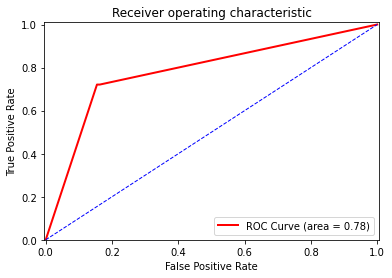

In [40]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [41]:
from sklearn import metrics

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)

print("Confusion matrix:")
print(cm_ANN)


Confusion matrix:
[[1690  309]
 [ 547 1414]]
